In [118]:
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

# #1

In [9]:
homes = pd.read_csv("data/homes.csv")

# #2

In [43]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sell       50 non-null     int64  
 1    "List"    50 non-null     int64  
 2    "Living"  50 non-null     int64  
 3    "Rooms"   50 non-null     int64  
 4    "Beds"    50 non-null     int64  
 5    "Baths"   50 non-null     int64  
 6    "Age"     50 non-null     int64  
 7    "Acres"   50 non-null     float64
 8    "Taxes"   50 non-null     int64  
dtypes: float64(1), int64(8)
memory usage: 3.6 KB


In [45]:
homes.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


# #3 
This dataset is about housing prices. It has information such as the sell price, list price, number of rooms, bedrooms, bathrooms, the age of the house, how many acres is on the property, and the property taxes. It is a dataset with 50 observations. The average sell price is 170.36, while the average list price is 178.34. For both the sell and list data, it is positively skewed. Number of rooms range from 5 to 12. Number of bedrooms is from 3 to 6, and number of bathrooms is from 1 to 4. The youngest home is 2 years old, while the oldest is 202. Acres range from 0.22 to 6.49 and taxes range from 1,445 to 12,192.

# #4
First, I will remove the quotations from the column names in order to be able to work with the data more easily. 

In [62]:
homes.columns = homes.columns.str.strip().str.replace('"', '')

### 4.1: Density Plot

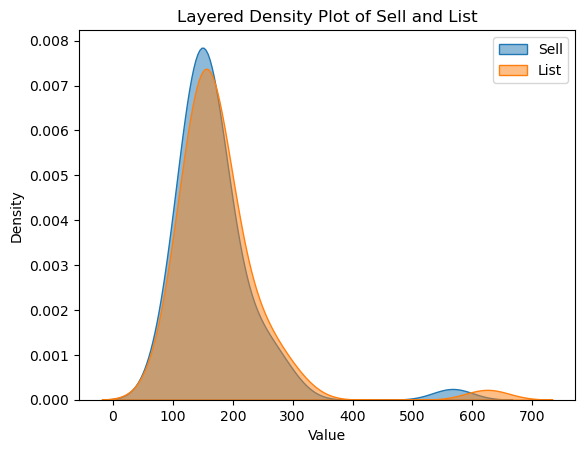

In [87]:
sb.kdeplot(data = homes.Sell, label='Sell', fill=True, alpha=0.5);
sb.kdeplot(data = homes.List, label='List', fill=True, alpha=0.5);

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Layered Density Plot of Sell and List')
plt.legend()

This density plot compares the sell and list prices. Overall, it shows that the two are fairly similar with most of the data concentrated around the 100-300 range. This tells us that most housing are selling for around their list price, but there are slightly more houses sold from the 100-200 range than are listed. As mentioned before, both are postively skewed and this graph shows that visually.

### 4.2: Correlation

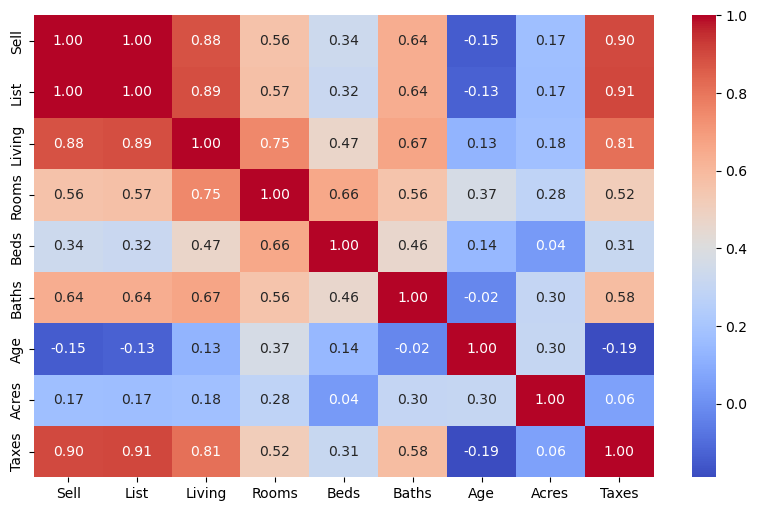

In [92]:
plt.figure(figsize=(10, 6))
sb.heatmap(homes.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

This correlation matrix shows correlation values between the variables of the dataset. Some values to note would be that List and Sell are 100% correlated, and Taxes has a correlation of 0.91 and 0.9, respectively. As home prices increase, so do taxes. Additionally, number of bathrooms is correlated to sell and list at double the rate. Lastly, the age of a house has a negative correlation with list and sell. As a home gets older the price decreases.

### 4.3: Boxplots

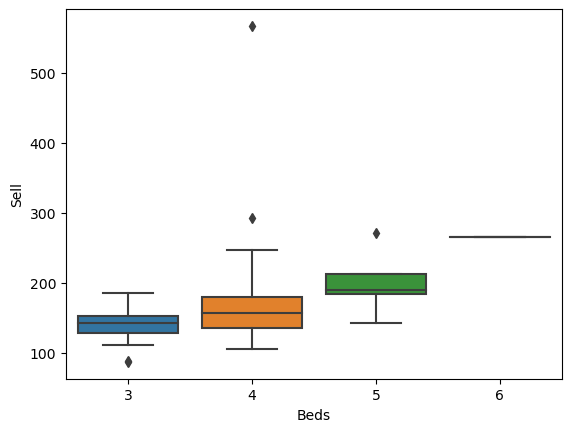

In [101]:
sb.boxplot(x=homes["Beds"], y=homes["Sell"]);

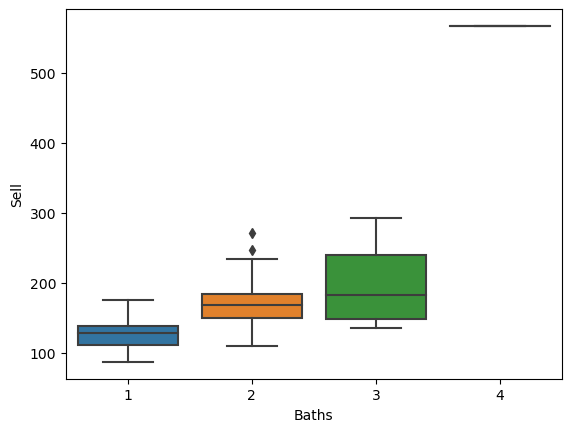

In [105]:
sb.boxplot(x=homes["Baths"], y=homes["Sell"]);

This boxplots show the distribution of the data and if there are any outliers. These two graphs show that as the number of bedrooms and bathrooms increase, so does the median sale price. There are a few outliers, but that is to be expected. The spread of data for the houses with 4 bedroom is by far the largest. This is also the most common number of bedrooms in this data set, as shown by the density plot below. It is worth noting that the median price for a house with 3 bathrooms only slightly increases from 2, but 3 bathrooms has a much higher maximum and minimum than 2.

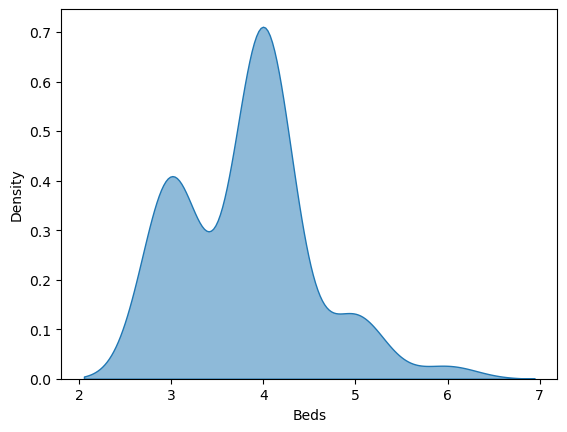

In [111]:
sb.kdeplot(data = homes.Beds, label='Beds', fill=True, alpha=0.5);

# #5

In [123]:
y = homes.Sell
x = homes.Taxes
x = sm.add_constant(x)

In [125]:
model = sm.OLS(y, x).fit()

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           7.22e-19
Time:                        21:29:42   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
Taxes          0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# #6
This is a good model, taxes is a good predictor of selling price. This is because the R-squared value is 80%, meaning that 80.9% of the variation in Selling price can be explained by taxes. Additionally, Taxes has a p-value of 0.00, meaning it is statistically significant to the model. 

# #7

In [132]:
y = homes.Sell
x = homes.Acres
x = sm.add_constant(x)

In [134]:
model = sm.OLS(y, x).fit()

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.406
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.242
Time:                        21:35:08   Log-Likelihood:                -284.08
No. Observations:                  50   AIC:                             572.2
Df Residuals:                      48   BIC:                             576.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8457     13.550     11.797      0.000     132.601     187.090
Acres         10.3021      8.687      1.186      0.242      -7.165      27.769
==============================================================================
Omnibus:                       70.495   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.048
Skew:                           3.678   Prob(JB):                    2.00e-161
Kurtosis:                      20.353   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Acres is not a good predictor of selling price. The R-squared value is 2.8% and the p-value is 0.242, meaning Acres is not significant in this model.

The model using taxes is much better. Some limitations of this model is that it only uses one predictor, when in reality there are many more factors that influence the price of the home. Additionally, outliers can skew the data, if there are observations with very extreme taxes compared to the rest of the data, it could skew the model in the wrong direction.